In [1]:
from google.colab import files
uploaded_files = files.upload()

Saving ml.zip to ml.zip


In [2]:
import zipfile
import os

zip_file_name = next(iter(uploaded_files))
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()
    print(f"Extracted to {os.getcwd()}")

Extracted to /content


In [3]:
!ls data

test  train


In [5]:
!ls data/train/cards

2024-03-08-09-53-56_2.png   2024-03-12-18-48-34_13.png	2024-03-12-19-05-48_14.png
2024-03-08-09-53-56_5.png   2024-03-12-18-48-34_14.png	2024-03-12-19-05-48_2.png
2024-03-08-09-54-37_1.png   2024-03-12-18-48-34_3.png	2024-03-12-19-05-48_3.png
2024-03-08-09-54-37_2.png   2024-03-12-18-48-34_4.png	2024-03-12-19-05-48_4.png
2024-03-08-09-54-37_4.png   2024-03-12-18-48-34_5.png	2024-03-12-19-05-48_7.png
2024-03-08-09-54-37_5.png   2024-03-12-18-48-34_8.png	2024-03-12-19-06-47_10.png
2024-03-08-09-55-13_2.png   2024-03-12-18-48-34_9.png	2024-03-12-19-06-47_11.png
2024-03-08-09-55-13_5.png   2024-03-12-18-49-36_10.png	2024-03-12-19-06-47_12.png
2024-03-08-09-55-42_1.png   2024-03-12-18-49-36_11.png	2024-03-12-19-06-47_13.png
2024-03-08-09-55-42_2.png   2024-03-12-18-49-36_12.png	2024-03-12-19-06-47_14.png
2024-03-08-09-55-42_4.png   2024-03-12-18-49-36_13.png	2024-03-12-19-06-47_1.png
2024-03-08-09-55-42_5.png   2024-03-12-18-49-36_14.png	2024-03-12-19-06-47_3.png
2024-03-08-09-55-42_6.png  

In [36]:
import os

for dirpath, dirnames, filenames in os.walk("data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 432 images in 'data/train/cards'.
There are 0 directories and 459 images in 'data/train/no_cards'.
There are 2 directories and 0 images in 'data/test'.
There are 0 directories and 145 images in 'data/test/cards'.
There are 0 directories and 154 images in 'data/test/no_cards'.


In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (86, 63, 3)


array([[[0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157],
        ...,
        [0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157]],

       [[0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157],
        ...,
        [0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157]],

       [[0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157],
        ...,
        [0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157],
        [0.1764706 , 0.16862746, 0.20392157]],

       ...,

       [[0.40392157, 0.41960785, 0.4745098 ],
        [0.40392157, 0.41960785, 0.4745098 ],
        [0.40392157, 0

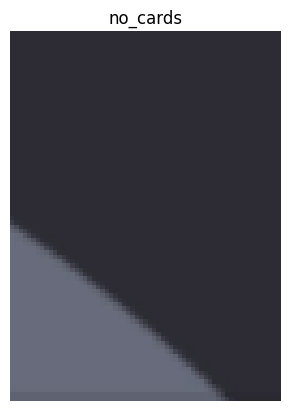

In [38]:
view_random_image("data/train/", "no_cards")

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(1/255.)
valid_datagen = ImageDataGenerator(1/255.)

train_dir = "data/train/"
test_dir = "data/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (86, 63),
                                               class_mode = 'binary',
                                               seed=42)
valid_data = train_datagen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size = (86, 63),
                                              class_mode = 'binary',
                                              seed = 42)

Found 891 images belonging to 2 classes.
Found 299 images belonging to 2 classes.


In [40]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (86, 63, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


28/28 [==============================] - 2s 29ms/step - loss: 2.1121 - accuracy: 0.4871 - val_loss: 0.6932 - val_accuracy: 0.4849
Epoch 2/5
28/28 [==============================] - 1s 23ms/step - loss: 0.6932 - accuracy: 0.4848 - val_loss: 0.6931 - val_accuracy: 0.5151
Epoch 3/5
28/28 [==============================] - 1s 25ms/step - loss: 0.6932 - accuracy: 0.5152 - val_loss: 0.6931 - val_accuracy: 0.5151
Epoch 4/5
28/28 [==============================] - 1s 24ms/step - loss: 0.6931 - accuracy: 0.5152 - val_loss: 0.6930 - val_accuracy: 0.5151
Epoch 5/5
28/28 [==============================] - 1s 23ms/step - loss: 0.6930 - accuracy: 0.5152 - val_loss: 0.6930 - val_accuracy: 0.5151


In [41]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 16254)             0         
                                                                 
 dense_6 (Dense)             (None, 4)                 65020     
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 65045 (254.08 KB)
Trainable params: 65045 (254.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


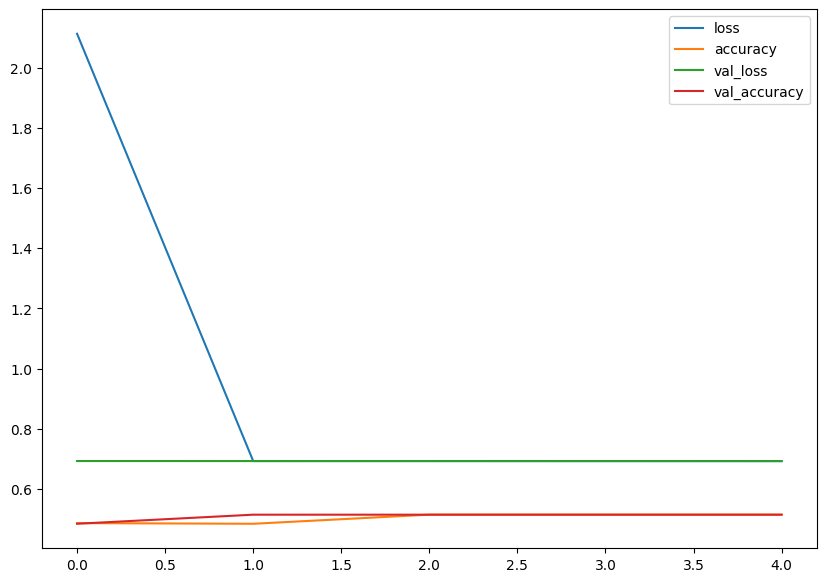

In [42]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [43]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

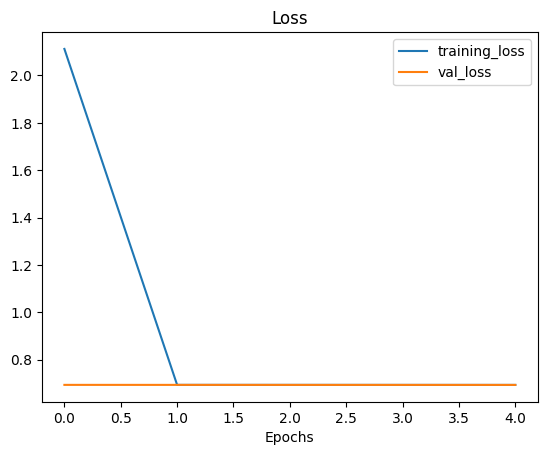

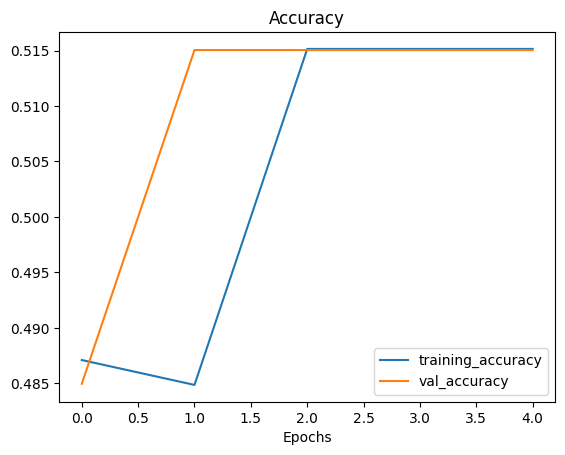

In [44]:
plot_loss_curves(history_1)

In [45]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [50]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(86, 63),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(86, 63),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)
print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(86, 63),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 891 images belonging to 2 classes.
Non-augmented training images:
Found 891 images belonging to 2 classes.
Unchanged test images:
Found 299 images belonging to 2 classes.


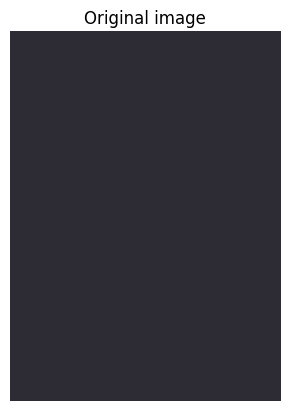

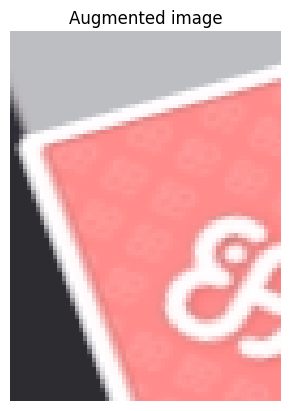

In [53]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the samerandom_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [67]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(86, 63, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
28/28 [==============================] - 3s 76ms/step - loss: 0.5280 - accuracy: 0.5432 - val_loss: 0.3913 - val_accuracy: 0.9599
Epoch 2/10
28/28 [==============================] - 2s 72ms/step - loss: 0.3655 - accuracy: 0.9484 - val_loss: 0.3499 - val_accuracy: 0.9732
Epoch 3/10
28/28 [==============================] - 3s 98ms/step - loss: 0.3381 - accuracy: 0.9899 - val_loss: 0.2883 - val_accuracy: 1.0000
Epoch 4/10
28/28 [==============================] - 2s 81ms/step - loss: 0.1154 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 5/10
28/28 [==============================] - 2s 72ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/10
28/28 [==============================] - 2s 72ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 8.4693e-04 - val_accuracy: 1.0000
Epoch 7/10
28/28 [==============================] - 2s 78ms/step - loss: 6.5095e-04 - accuracy: 1.0000 - val_loss: 5.0484e-04 - val_accuracy: 1.0000
E

In [68]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

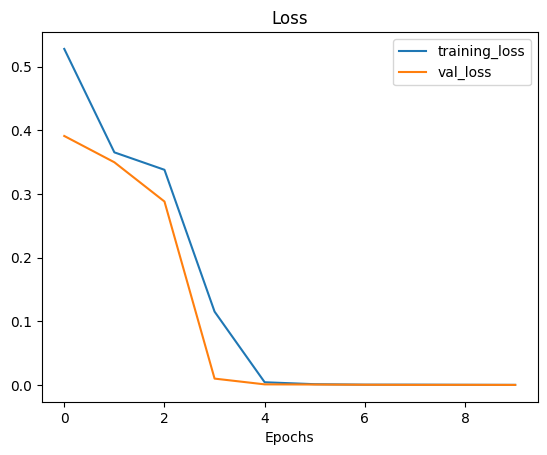

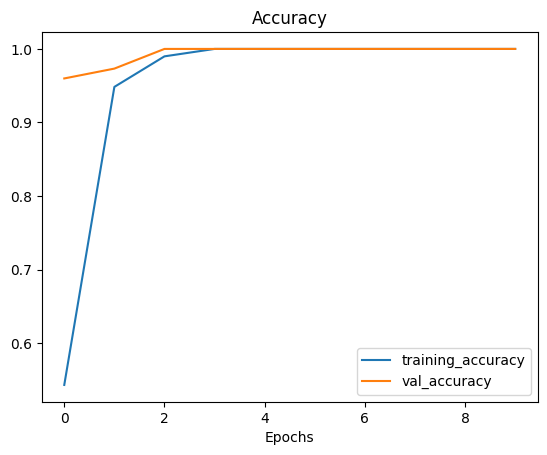

In [69]:
plot_loss_curves(history_2)

In [70]:
model_2.evaluate(test_data)

10/10 [==============================] - 0s 17ms/step - loss: 2.2621e-04 - accuracy: 1.0000


[0.00022621422249358147, 1.0]

In [71]:
model_2.save('model.h5')

In [72]:
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>